<a href="https://colab.research.google.com/github/NiteeshSingh/DS-303-Course-Project/blob/main/SARIMA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/AAPL.csv')

In [ ]:
dataset.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.337023,1296484000
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.061180,1609364400


In [ ]:
dataset['Mean'] = (dataset['Low'] + dataset['High'])/2


In [ ]:
dataset.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.337023,1296484000,3.924107
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.061180,1609364400,3.728393


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2768 non-null   object 
 1   Open       2768 non-null   float64
 2   High       2768 non-null   float64
 3   Low        2768 non-null   float64
 4   Close      2768 non-null   float64
 5   Adj Close  2768 non-null   float64
 6   Volume     2768 non-null   int64  
 7   Mean       2768 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 173.1+ KB


In [ ]:
steps=-1
dataset_for_prediction= dataset.copy()
dataset_for_prediction['Actual']=dataset_for_prediction['Mean'].shift(steps)
dataset_for_prediction.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.337023,1296484000,3.924107,3.728393
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.061180,1609364400,3.728393,3.591964
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.968519,2294398400,3.591964,3.327143


In [ ]:
dataset_for_prediction=dataset_for_prediction.dropna()

We have added date below as shown

In [ ]:
dataset_for_prediction['Date'] =pd.to_datetime(dataset_for_prediction['Date'])
dataset_for_prediction.index= dataset_for_prediction['Date']
dataset_for_prediction.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
Date,,,,,,,,,
2008-10-01,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.337023,1296484000,3.924107,3.728393
2008-10-02,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.061180,1609364400,3.728393,3.591964
2008-10-03,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.968519,2294398400,3.591964,3.327143


Let’s plot the mean stock prices for the current day and look at the trends.


Text(0.5, 1.0, 'Apple Opening Stock Value')

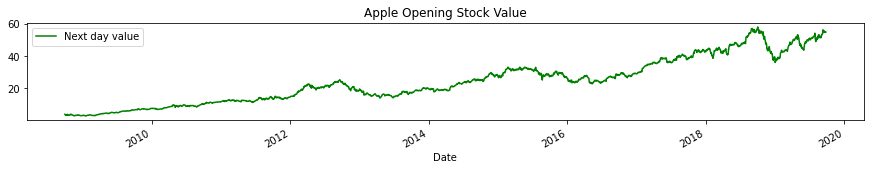

In [ ]:
dataset_for_prediction['Mean'].plot(color='green', figsize=(15,2))
plt.legend(['Next day value', 'Mean'])
plt.title("Apple Opening Stock Value")

Plotting volume of Apple stocks sold daily

Text(0.5, 1.0, ' Apple Stock Volume')

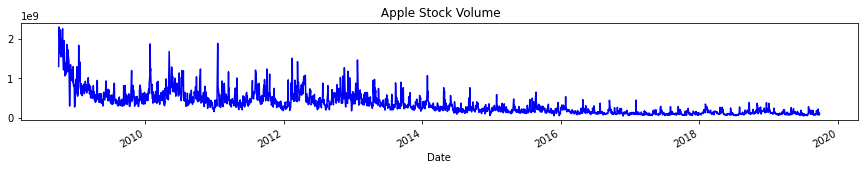

In [ ]:
dataset_for_prediction['Volume'].plot(color='blue', figsize=(15,2))
plt.title(" Apple Stock Volume")

**Normalizing the input and target features**

Since the stock prices and volume are on a different scale, we need to normalize the data. We use MinMaxScaler; it will scale the data to a fixed range between 0 to 1
Scaling the input features- Low, High, Open, Close, Volume, Adjusted Close, and Mean


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[['Low', 'High','Open', 'Close', 'Volume', 'Adj Close', 'Mean']])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input
X.index= dataset_for_prediction['Date']
X.head(3)

,0,1,2,3,4,5,6
Date,,,,,,,
2008-10-01,0.019075,0.019558,0.021177,0.019996,0.556275,0.017620,0.019318
2008-10-02,0.014246,0.017258,0.018632,0.014163,0.695398,0.012480,0.015763
2008-10-03,0.010750,0.015783,0.016021,0.012203,1.000000,0.010753,0.013284


Scaling the output features -Actual. We are using a different instance of MinMaxScaler here. This will allow us to perform an inverse transform of the predicted stock prices later easily.


In [ ]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dataset_for_prediction[['Actual']])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

Renaming the column names for input features and target variable for better understanding as the column names are currently numbers.


In [ ]:
X.rename(columns={0:'Low', 1:'High', 2:'Open', 3:'Close', 4:'Volume', 5:'Adj Close', 6:'Mean'}, inplace=True)
X.head(2)

,Low,High,Open,Close,Volume,Adj Close,Mean
Date,,,,,,,
2008-10-01,0.019075,0.019558,0.021177,0.019996,0.556275,0.01762,0.019318
2008-10-02,0.014246,0.017258,0.018632,0.014163,0.695398,0.01248,0.015763


Renaming target variable

In [ ]:
y.rename(columns={0:'Stock Price next day'}, inplace= True)
y.index= dataset_for_prediction['Date']
y.head(2)

,Stock Price next day
Date,
2008-10-01,0.015763
2008-10-02,0.013284


Splitting the data into training and test set
Our training set will be 70%, and the test set will be 30% of the entire data set.

In [ ]:
train_size=int(len(dataset) * 0.7)
test_size = int(len(dataset)) - train_size
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

**Decomposing Time Series into several components-Trend, Seasonality, and Random noise**

We know that Time series data is composed of Level, Trend, Seasonality, and Random noise. Let’s decompose the data and plot the trend, seasonality, and randomness in the data.
We use statsmodel for seasonal decompose as an additive model and the frequency of the time series, which is the periodicity of the data, which is 365 days for yearly data.

Additive model = Trend + Seasonality + Random Noise

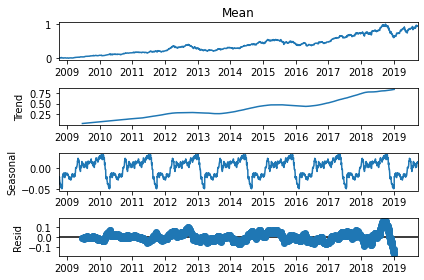

In [ ]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(X['Mean'],model='add',period=365);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

If we make the data stationary, then the model can make predictions based on the fact that mean and variance will remain the same in the future. A stationarized series is easier to predict
To check if the data is stationary, we will use the Unit Root Test. It is the most popular statistical method to find if the series is stationary or not.
We have written a function that will check the p-value from the Unit Root Test results. If the value of p < 0.05, then the data is stationary, else the data is not stationary. We can make the data stationary by methods like differencing

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

we create a series for the target variable to check for stationarity

In [ ]:
y_test=y['Stock Price next day'][:train_size].dropna()
test_adf(y_test, " Stock Price")

Strong evidence for  Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for  Stock Price


Let’s check if we can make the data stationary by applying one difference using diff()

In [ ]:
test_adf(y_test.diff(), " Stock Price")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary  Stock Price


**Building the Model**

Let’s apply **ARIMA** and **SARIMAX** to our data and see which one works better. For both **ARIMA** and **SARIMA** or SARIMAX, we need to know the AR and MA terms to correct any autocorrelation in the differenced series

The systematic way to do this is to use autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series.

ACF plot: is a bar chart of the coefficients of correlation between a time series and its lags. It helps determine the value of p or the AR term.

PACF plot: a plot of the partial correlation coefficients between the series and lags of itself. Helps determine the value of q or the MA term

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


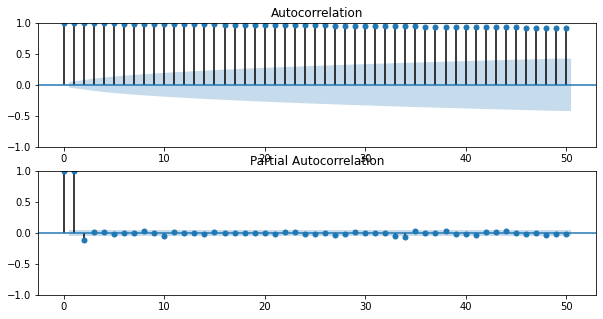

In [ ]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

We see that the PACF plot has a significant spike at lag 1 and lag 2, meaning that all the higher-order autocorrelations are effectively explained by the lag-1 and lag 2 autocorrelations.

We will use pyramid auto Arima to perform a stepwise search for AR and MA term that gives the lowest value of AIC.

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y, 
 exogenous= train_X,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15584.604, Time=11.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15557.800, Time=0.97 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15572.036, Time=3.89 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15640.795, Time=7.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15557.478, Time=3.89 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15569.583, Time=6.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15567.723, Time=4.41 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-15563.538, Time=2.87 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 40.731 seconds


In [ ]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1937
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7830.397
Date:                Wed, 04 May 2022   AIC                         -15640.795
Time:                        06:04:42   BIC                         -15585.111
Sample:                             0   HQIC                        -15620.315
                               - 1937                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.102e-05   5.38e-05      1.321      0.187   -3.44e-05       0.000
Low           -0.0021      0.026     -0.081      0.936      -0.053       0.049
High          -0.0474      0.029     -1.651      0.099      -0.104       0.009
Open          -0.1173      0.029     -4.069      0.000      -0.174      -0.061
Close          0.8478      0.321      2.644      0.008       0.219       1.476
Volume         0.0019      0.001      1.346      0.178      -0.001       0.005
Adj Close     -0.0220      0.338     -0.065      0.948      -0.684       0.640
Mean          -0.0249      0.021     -1.206      0.228      -0.065       0.016
ma.L1         -0.4917      0.050     -9.826      0.000      -0.590      -0.394
sigma2       1.76e-05   2.11e-07     83.374      0.000    1.72e-05     1.8e-05
===================================================================================
Ljung-Box (L1) (Q):                   5.78   Jarque-Bera (JB):             17572.96
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               7.46   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.37e+18. Standard errors may be unstable.
"""

In [ ]:
train_y.index

DatetimeIndex(['2008-10-01', '2008-10-02', '2008-10-03', '2008-10-06',
               '2008-10-07', '2008-10-08', '2008-10-09', '2008-10-10',
               '2008-10-13', '2008-10-14',
               ...
               '2016-05-27', '2016-05-31', '2016-06-01', '2016-06-02',
               '2016-06-03', '2016-06-06', '2016-06-07', '2016-06-08',
               '2016-06-09', '2016-06-10'],
              dtype='datetime64[ns]', name='Date', length=1937, freq=None)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y, 
 exog=train_X,
 order=(0,1,1),
 enforce_invertibility=False, enforce_stationarity=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


we now fit the model

In [ ]:
results= model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Predict or forecast the results

To predict, we can predict() or forecast() methods of SARIMAX on the object returned by fitting the data.

Below we use predict() and provide the start and end, along with the exog variable based on which the predictions will be made.

In [ ]:
predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
forecast_1= results.forecast(steps=test_size-1, exog=test_X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


Plot the predictions

we now plot the predictions and the forecast

We will create a data frame for string the Actual scaled stock prices

In [ ]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])


We now create the data frame to store the Date, Actual and Predicted data


In [ ]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = act['Stock Price next day']
predictions.head(3)

,predicted_mean,Actual
Date,,
2016-06-13,0.389701,0.391368
2016-06-14,0.390717,0.391844
2016-06-15,0.389058,0.388166


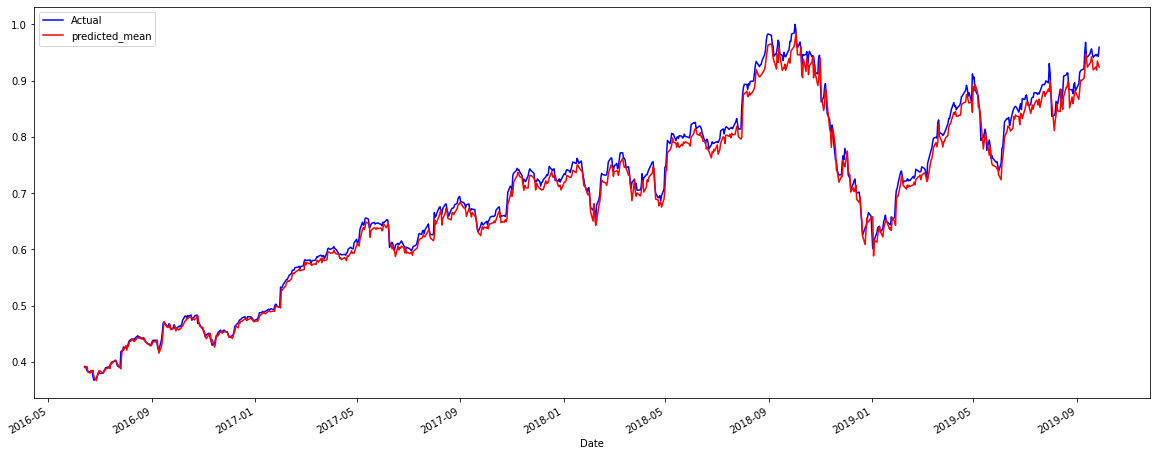

In [ ]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['predicted_mean'].plot(legend=True, color='red', figsize=(20,8))


We now create the data frame to store the Date, Actual and Forecasted data.

In [ ]:
forecast_apple= pd.DataFrame(forecast_1)
forecast_apple.reset_index(drop=True, inplace=True)
forecast_apple.index=test_X.index
forecast_apple['Actual'] =scaler_output.iloc[train_size:, 0]


In [ ]:
forecast_apple.rename(columns={'predicted_mean':'Forecast'}, inplace=True)
forecast_apple.head(3)

,Forecast,Actual
Date,,
2016-06-13,0.389701,0.391368
2016-06-14,0.390717,0.391844
2016-06-15,0.389058,0.388166


Plotting the forecast

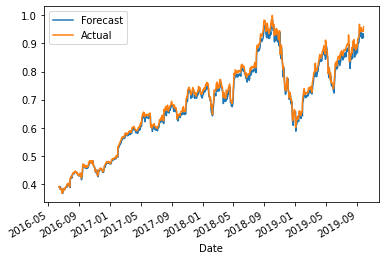

In [ ]:
forecast_apple['Forecast'].plot(legend=True)
forecast_apple['Actual'].plot(legend=True)

Evaluating the model

We will use root mean square error for evaluating the model’s performance

In [ ]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions['predicted_mean'], predictions['Actual'])
error

0.014650051337007123